## Preparing the environment

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Dataset

In [2]:
# Importing a dataset and creating a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df_init = data.copy()

## Preparing the dataset

In [3]:
# Retention of records whose ocean_proximity has the value "<1H OCEAN" or "INLAND".
df_subset = df_init.loc[df_init['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
display(df_subset.shape)
display(df_subset.head())

(15687, 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [4]:
# Create a copy of the DataFrame 'df_subset' and assign it to 'df'
df = df_subset.copy()

In [5]:
# Converting string columns to lowercase and replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_').str.lower()
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
# Count missing values in each column of the DataFrame 'df'
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Fill missing values in the 'total_bedrooms' column with 0
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

# Check for remaining missing values in each column of DataFrame 'df'
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# Splitting the data into train, validation, and test sets
# Importing library
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the DataFrame 'df' into three subsets: training, validation, and testing.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Displaying the sizes of different data sets
n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
# print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}\t{(n_train / n) * 100:.0f}%")
print(f"n_val = \t\t{n_val}\t{(n_val / n) * 100:.0f}%")
print(f"n_test = \t\t{n_test}\t{(n_test / n) * 100:.0f}%")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")
     


n_dataset = 		15687
n_train = 		9411	60%
n_val = 		3138	20%
n_test = 		3138	20%
check of sum:
(train + val + test) = 	15687


In [10]:
# Reset the indexes for df_train, df_val, and df_test
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# Creating target variables for the training, validation, and test datasets.
# These variables represent the 'above_average' column values from their respective datasets.
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [12]:
# Removing the 'median_house_value' column from the training, validation, and test datasets.
# This column is being dropped as it is the target variable for binary classification.
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [13]:
# Create a list of column names containing numerical data types (int64 and float64)
# from the DataFrame.
num = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
print(num)

# Creating a list of column names ('cat') where the data type is 'object'
cat = list(df_train.select_dtypes(include=['object']).columns)
print(cat)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']


In [14]:
# One-hot encoding categorical variables and training
# Importing libraries
from sklearn.feature_extraction import DictVectorizer

In [15]:
# Converting data sets into dictionaries
train_dict = df_train[num + cat].to_dict(orient="records")
val_dict = df_val[num + cat].to_dict(orient="records")

# One-hot encoding of categorical variables
dv = DictVectorizer(sparse=False)

# Preparing feature matrices
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

### Questions 1

In [16]:
# Imports the DecisionTreeRegressor from the scikit-learn library
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Initializing the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=1)
# Training the Model:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [18]:
# Importing the module to export the decision tree
from sklearn.tree import export_text
tree_text = export_text(dt, feature_names=dv.get_feature_names_out())
print(tree_text)

|--- ocean_proximity=<1h_ocean <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1h_ocean >  0.50
|   |--- value: [12.30]



[Text(0.5, 0.75, 'x[5] <= 0.5\nsquared_error = 0.322\nsamples = 9411\nvalue = 12.011'),
 Text(0.25, 0.25, 'squared_error = 0.23\nsamples = 3924\nvalue = 11.607'),
 Text(0.75, 0.25, 'squared_error = 0.186\nsamples = 5487\nvalue = 12.301')]

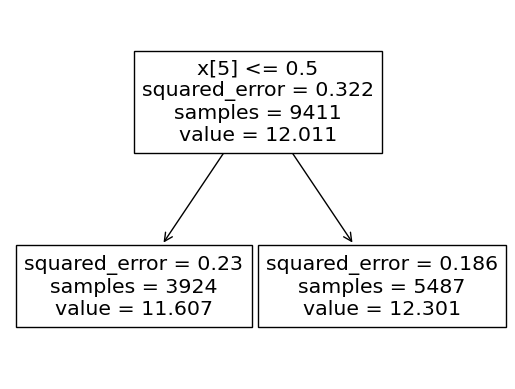

In [19]:
# Importing the module to plot decision trees
from sklearn import tree
tree.plot_tree(dt)

In [20]:
# Split the text into lines
lines = tree_text.split('\n')

for line in lines:
    # Look for the line that contains "ocean_proximity"for line in lines:
    if "ocean_proximity" in line:
        feature_used = line.strip().split()[1]  # Extract the feature
        break  # Exit the loop after finding the feature

In [21]:
print(f"\nAnswer to question 1:")
print(f'The feature used for splitting the data is:{feature_used}')


Answer to question 1:
The feature used for splitting the data is:ocean_proximity=<1h_ocean


### Question 2

In [22]:
# Imports the RandomForestRegressor and mean_squared_error from the scikit-learn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [23]:
# Create and train RandomForestRegressor model with specific parameters
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
# Make predictions on the validation data using the trained RandomForestRegressor model
y_pred = rfr.predict(X_val)

# Calculate the Root Mean Square Error (RMSE) between the actual and predicted values
rsme = np.sqrt(mean_squared_error(y_val, y_pred))

In [25]:
import math
MSE = np.square(np.subtract(y_val,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.24439322370345506


In [26]:
print(f"\nAnswer to question 2:")
print(f'RMSE of this model when validated is:{rsme:.3f}')


Answer to question 2:
RMSE of this model when validated is:0.244


### Question 3

In [28]:
# Imports the tqdm library 
from tqdm.auto import tqdm

In [29]:
# Initialize an empty list to store scores
scores = []

# Define a range of values for n_estimators
n_est_values = list(range(10, 201, 10))

# Loop through different n_estimators values
for n in tqdm(n_est_values):
    # Create and train RandomForestRegressor model with the specified number of estimators
    rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = rfr.predict(X_val)
        
    # Calculate the Root Mean Square Error (RMSE) between predictions and actual values
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Append a tuple of n_estimators and the calculated RMSE to the scores list
    scores.append((n, score))


  0%|          | 0/20 [00:00<?, ?it/s]

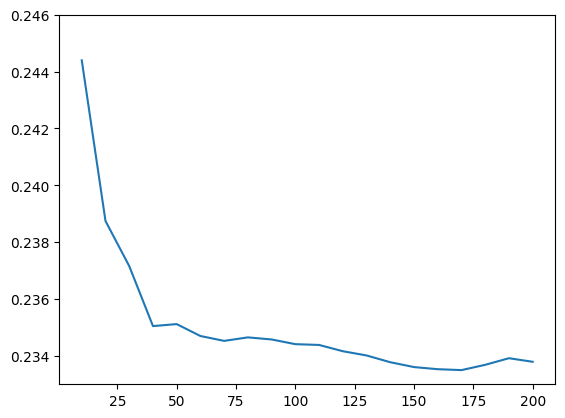

In [30]:
# Create a DataFrame to store scores with columns 'n_est' and 'rmse'
columns = ["n_est", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

# Generate a line plot of 'n_est' against 'rmse'
plt.plot(df_scores.n_est, df_scores.rmse)
plt.ylim(0.233, 0.246)
plt.show()

In [31]:
# Create a list of results in the form of tuples (n_estimators, RMSE)
results = [(n_est, rmse) for n_est, rmse in zip(n_est_values, scores)]

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['n_est', 'RMSE'])

# Find the value of n_estimators at which RMSE stops improving
best_rmse = min(scores, key=lambda x: x[1])
best_rmse_index = scores.index(best_rmse)
n_est_with_best_rmse = n_est_values[best_rmse_index]

# Add a row with the best RMSE to the DataFrame
best_rmse_row = pd.DataFrame({'n_est': ['Best RMSE'], 'RMSE': [best_rmse[1]]})
results_df = pd.concat([results_df, best_rmse_row], ignore_index=True)

print(results_df)
print()

        n_est                        RMSE
0          10   (10, 0.24439322370345506)
1          20   (20, 0.23874285056530062)
2          30    (30, 0.2371566638279877)
3          40    (40, 0.2350470906205495)
4          50   (50, 0.23511660039766477)
5          60   (60, 0.23469770435436976)
6          70   (70, 0.23452641989979106)
7          80    (80, 0.2346496890258071)
8          90   (90, 0.23457610662527956)
9         100   (100, 0.2344108214215694)
10        110  (110, 0.23438347875223398)
11        120  (120, 0.23416279236787463)
12        130  (130, 0.23401373837057926)
13        140  (140, 0.23377520828942366)
14        150  (150, 0.23360507756696328)
15        160  (160, 0.23353023587127117)
16        170  (170, 0.23349855602511513)
17        180  (180, 0.23368449352358087)
18        190  (190, 0.23391668255941678)
19        200  (200, 0.23379087983979704)
20  Best RMSE                    0.233499



In [32]:
print(f"\nAnswer to question 3:")
print(f'RMSE stops improving after n_estimators exceed:{n_est_with_best_rmse}')


Answer to question 3:
RMSE stops improving after n_estimators exceed:170


### Question 4

max_depth=10:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth=15:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth=20:   0%|          | 0/20 [00:00<?, ?it/s]

max_depth=25:   0%|          | 0/20 [00:00<?, ?it/s]

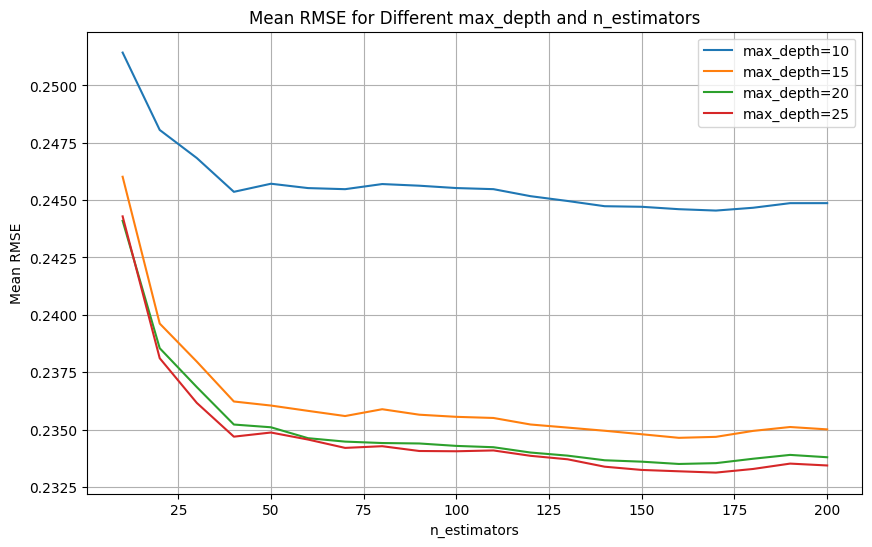

In [33]:
# List of max_depth values to test
max_depth_values = [10, 15, 20, 25]

# Range of n_estimators values to test
n_est_values = list(range(10, 201, 10))

# Initialize a list to store mean RMSE results
mean_rmse_values = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    rmse_values = []
    
    # Iterate over different n_estimators values
    for n in tqdm(n_est_values, desc=f"max_depth={max_depth}"):
        rmse_scores = [] 
        
        # Create and train a RandomForestRegressor model
        rfr = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        
        # Make predictions on the validation set
        y_pred = rfr.predict(X_val)
        
        # Calculate RMSE for the predictions
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
        
        # Calculate the mean RMSE for the given max_depth and n_estimators combination
        mean_rmse = np.mean(rmse_scores)
        rmse_values.append(mean_rmse)
    
    # Add the RMSE results to the list of mean RMSE values
    mean_rmse_values.append(rmse_values)

# Find the best max_depth based on mean RMSE
best_max_depth = min(mean_rmse_values, key=lambda x: x[2])[0]

# Generate a plot
plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depth_values):
    plt.plot(n_est_values, mean_rmse_values[i], label=f'max_depth={max_depth}')
plt.xlabel('n_estimators')
plt.ylabel('Mean RMSE')
plt.legend()
plt.title('Mean RMSE for Different max_depth and n_estimators')
plt.grid(True)
plt.show()

In [34]:
print(f"\nAnswer to question 4:")
print(f'Best max_depth based on mean RMSE:{best_max_depth:.2f}')


Answer to question 4:
Best max_depth based on mean RMSE:0.24


### Question 5

In [35]:
# Creating a RandomForestRegressor model with specified parameters
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

# Training the RandomForestRegressor model with training data
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
# Get feature importances from a RandomForestRegressor model
importances = rfr.feature_importances_

# Get the feature names
features = dv.get_feature_names_out()

# Create a DataFrame to store feature importances
feature_importance = pd.DataFrame(importances, index=features)

print("Feature Importances:")
feature_importance

Feature Importances:


,0
households,0.014982
housing_median_age,0.030277
latitude,0.102203
longitude,0.086423
median_income,0.335013
ocean_proximity=<1h_ocean,0.218820
ocean_proximity=inland,0.147460
population,0.027881
total_bedrooms,0.015313
total_rooms,0.021627


In [37]:
# Sort the DataFrame with feature importances in descending order
sorted_feature_importance = feature_importance.sort_values(by=0, ascending=False)

# Get the most important feature (first row in the DataFrame after sorting)
most_important_feature = sorted_feature_importance.index[0]

# Get the value of the most important feature
most_important_value = sorted_feature_importance.iloc[0, 0]

<Axes: >

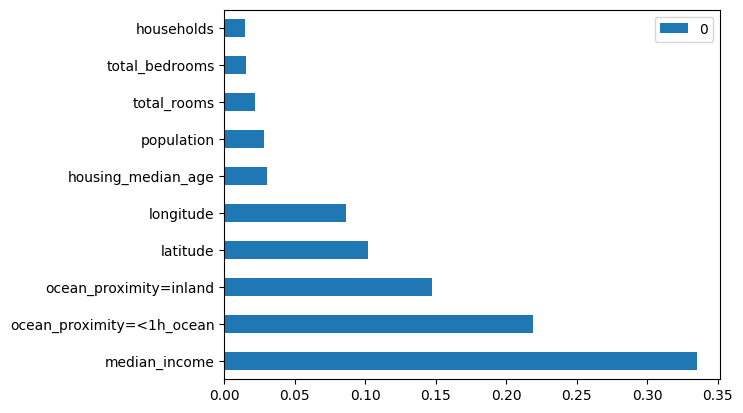

In [38]:
# Create a horizontal bar plot to visualize feature importances
sorted_feature_importance.plot.barh()

In [39]:
print(f"\nAnswer to question 5:")
print(f'Most Important Feature is: {most_important_feature} | {most_important_value:.5f}')


Answer to question 5:
Most Important Feature is: median_income | 0.33501


### Question 6

In [40]:
# Import the XGBoost library
import xgboost as xgb

In [41]:
# Creating XGBoost DMatrix objects for training and validation data
d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_val, label=y_val)

In [42]:
# Creating a watchlist for monitoring training progress
watchlist = [(d_train, 'train'), (d_val, 'val')]

In [43]:
# This function takes as input the output from an XGBoost training process, 
# splits it into lines, and extracts information about the number of iterations, 
# training RMSE (Root Mean Squared Error), and validation RMSE for each iteration. 
# It then stores these results in a pandas DataFrame with appropriate column 
# names and returns the DataFrame for further analysis or visualization.

def parse_xgb_output(output):
    results = []
    
    # Split the output by newline characters
    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")
        
        # Extract and format the iteration number, training RMSE, and validation RMSE
        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])

        # Append the results as a tuple to the 'results' list
        results.append((it, train, val))
    
    # Define column names for the DataFrame
    columns = ["num_iter", "train_rmse", "val_rsme"]
    
    # Create a DataFrame using the parsed results and column names
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [44]:
# Create an empty dictionary
scores_eta = {}

In [47]:
%%capture output

# Define XGBoost parameters
xgb_params = {
    "eta": 0.3, #0.3, 0.1
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

# Train an XGBoost model with the specified parameters
model = xgb.train(xgb_params, d_train, evals=watchlist, num_boost_round=100)

In [48]:
# Create a key_text_eta string with the value of 'eta' from xgb_params
key_text_eta = f"eta = {xgb_params['eta']}"

# Store the parsed XGBoost output in the scores_eta dictionary with key_text_eta as the key
scores_eta[key_text_eta] = parse_xgb_output(output)

key_text_eta

'eta = 0.3'

In [49]:
scores_eta.keys()

dict_keys(['eta = 0.1', 'eta = 0.3'])

In [50]:
# Initialize a variable for the best RMSE as positive infinity at the beginning
best_rmse = float('inf')  

# Initialize a variable for the corresponding best eta as None
best_eta = None

# Loop through the items in the 'scores_eta' dictionary
for key_eta, df_score in scores_eta.items():
    # Find the minimum RMSE in the 'val_rsme' column of the DataFrame
    min_rmse = df_score['val_rsme'].min()
    
    # Check if the minimum RMSE is less than the current best RMSE
    if min_rmse < best_rmse:
        best_rmse = min_rmse  # Update the best RMSE
        best_eta = key_eta  # Update the corresponding best eta

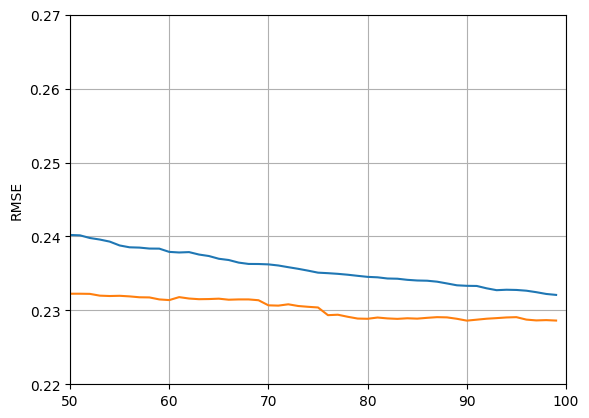

In [51]:
for key_eta, df_score in scores_eta.items():
    # Create a line plot for RMSE values against the number of iterations
    plt.plot(df_score.num_iter, df_score.val_rsme, label=key_eta)

plt.ylabel("RMSE")
plt.xlim((50, 100))
plt.ylim((0.22, 0.27))
plt.grid(True)
plt.show()

In [52]:
print(f"\nAnswer to question 6:")
print(f'The best RMSE result on the validation dataset {best_rmse} is led by eta: {best_eta}')


Answer to question 6:
The best RMSE result on the validation dataset 0.22861 is led by eta: eta = 0.3
